In [1]:
import pyswcloader
import os
import urllib

In [2]:
# data_path = $DATA_PATH
# save_path = $SAVE_PATH

In [3]:
data_path = '/home/gao/Downloads/testdata/'
save_path = '/home/gao/Downloads/testdata/'

# mirror swc data to the same side

In [4]:
for path in pyswcloader.swc.read_neuron_path(data_path):
    neuron_name = os.path.basename(path)
    data = pyswcloader.swc.swc_preprocess(path, 
                                          save=True, 
                                          save_path=os.path.join(save_path, neuron_name),
                                          check_validity=True,  #check swc validity by checking soma numbers
                                          flip=True,  #flip all neurons to the left side of the brain
                                          dimension=[13200, 8000, 11400],  #check outliers, default dimension: mouse template brain
                                         )

# data overview

100%|██████████| 9/9 [00:00<00:00, 96.21it/s]


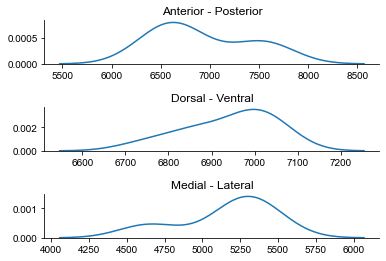

In [5]:
plot = pyswcloader.swc.plot_soma_distribution(data_path)

# load brain information

In [6]:
# download denpendency files

# annotated allen template brain
urllib.request.urlretrieve('http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_10.nrrd',
                           'annotation_10.nrrd')

# allen template brain annotation
urllib.request.urlretrieve('http://api.brain-map.org/api/v2/structure_graph_download/1.json',
                           'info.json')

('info.json', <http.client.HTTPMessage at 0x7f310402a1f0>)

In [7]:
anno = pyswcloader.brain.read_nrrd('annotation_10.nrrd')

(1320, 800, 1140)


In [8]:
stl_acro_dict = pyswcloader.brain.acronym_dict('info.json')

In [9]:
stl_acro_dict

{997: 'root',
 8: 'grey',
 567: 'CH',
 688: 'CTX',
 695: 'CTXpl',
 315: 'Isocortex',
 184: 'FRP',
 68: 'FRP1',
 667: 'FRP2/3',
 526157192: 'FRP5',
 526157196: 'FRP6a',
 526322264: 'FRP6b',
 500: 'MO',
 107: 'MO1',
 219: 'MO2/3',
 299: 'MO5',
 644: 'MO6a',
 947: 'MO6b',
 985: 'MOp',
 320: 'MOp1',
 943: 'MOp2/3',
 648: 'MOp5',
 844: 'MOp6a',
 882: 'MOp6b',
 993: 'MOs',
 656: 'MOs1',
 962: 'MOs2/3',
 767: 'MOs5',
 1021: 'MOs6a',
 1085: 'MOs6b',
 453: 'SS',
 12993: 'SS1',
 12994: 'SS2/3',
 12995: 'SS4',
 12996: 'SS5',
 12997: 'SS6a',
 12998: 'SS6b',
 322: 'SSp',
 793: 'SSp1',
 346: 'SSp2/3',
 865: 'SSp4',
 921: 'SSp5',
 686: 'SSp6a',
 719: 'SSp6b',
 353: 'SSp-n',
 558: 'SSp-n1',
 838: 'SSp-n2/3',
 654: 'SSp-n4',
 702: 'SSp-n5',
 889: 'SSp-n6a',
 929: 'SSp-n6b',
 329: 'SSp-bfd',
 981: 'SSp-bfd1',
 201: 'SSp-bfd2/3',
 1047: 'SSp-bfd4',
 1070: 'SSp-bfd5',
 1038: 'SSp-bfd6a',
 1062: 'SSp-bfd6b',
 480149202: 'VISrll',
 480149206: 'VISrll1',
 480149210: 'VISrll2/3',
 480149214: 'VISrll4',
 48014

In [10]:
allen_brain_tree = pyswcloader.brain.allen_brain_tree('info.json')

In [11]:
allen_brain_tree.show()

997
├── 8
│   ├── 343
│   │   ├── 313
│   │   │   ├── 323
│   │   │   │   ├── 35
│   │   │   │   ├── 58
│   │   │   │   ├── 66
│   │   │   │   ├── 75
│   │   │   │   ├── 115
│   │   │   │   ├── 128
│   │   │   │   │   ├── 539
│   │   │   │   │   ├── 548
│   │   │   │   │   └── 555
│   │   │   │   ├── 214
│   │   │   │   ├── 231
│   │   │   │   ├── 246
│   │   │   │   ├── 294
│   │   │   │   │   ├── 10
│   │   │   │   │   │   ├── 494
│   │   │   │   │   │   ├── 503
│   │   │   │   │   │   └── 511
│   │   │   │   │   ├── 17
│   │   │   │   │   ├── 26
│   │   │   │   │   └── 42
│   │   │   │   ├── 381
│   │   │   │   ├── 615
│   │   │   │   ├── 616
│   │   │   │   ├── 749
│   │   │   │   ├── 757
│   │   │   │   ├── 795
│   │   │   │   │   ├── 50
│   │   │   │   │   ├── 67
│   │   │   │   │   ├── 587
│   │   │   │   │   └── 614454277
│   │   │   │   ├── 975
│   │   │   │   ├── 1100
│   │   │   │   │   ├── 215
│   │   │   │   │   ├── 531
│   │   │   │   │   ├── 628
│   │   │   │   │   ├── 6

# calculate projection information

In [12]:
projection_length = pyswcloader.projection_batch.projection_length(data_path=data_path,
                                                                  annotation=anno,
                                                                  resolution=10,
                                                                  cores=4,)

100%|██████████| 9/9 [03:39<00:00, 24.44s/it]


In [13]:
projection_length

,1,2,6,7,9,10,12,15,17,19,...,607344830,607344834,607344838,607344842,607344846,607344850,607344854,607344858,607344862,614454277
192710_013,417.941937,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_009,0.000000,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_019,1285.567037,0,0.000000,0,0,0.000000,299.967231,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_014,0.000000,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_017,0.000000,0,148.456419,0,0,3969.558206,0.000000,1526.591055,529.688328,0,...,0,0,0,0,0,0,0,0,0,0
192710_012,0.000000,0,553.914549,0,0,542.067003,0.000000,0.000000,568.470245,0,...,0,0,0,0,0,0,0,0,0,0
192710_010,0.000000,0,0.000000,0,0,300.015571,0.000000,0.000000,317.351794,0,...,0,0,0,0,0,0,0,0,0,0
192710_016,0.000000,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_018,607.366587,0,0.000000,0,0,0.000000,0.000000,882.317809,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# change region ids to acronyms
projection_length.columns = [stl_acro_dict[item] for item in projection_length.columns]
projection_length

,TMv,SSp-m6b,int,PSV,SSp-tr6a,SCig,IF,PT,SCiw,IG,...,PN,IPR,IPC,IPA,IPL,IPI,IPDM,IPDL,IPRL,Su3
192710_013,417.941937,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_009,0.000000,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_019,1285.567037,0,0.000000,0,0,0.000000,299.967231,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_014,0.000000,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_017,0.000000,0,148.456419,0,0,3969.558206,0.000000,1526.591055,529.688328,0,...,0,0,0,0,0,0,0,0,0,0
192710_012,0.000000,0,553.914549,0,0,542.067003,0.000000,0.000000,568.470245,0,...,0,0,0,0,0,0,0,0,0,0
192710_010,0.000000,0,0.000000,0,0,300.015571,0.000000,0.000000,317.351794,0,...,0,0,0,0,0,0,0,0,0,0
192710_016,0.000000,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
192710_018,607.366587,0,0.000000,0,0,0.000000,0.000000,882.317809,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
terminal_count = pyswcloader.projection_batch.terminal_count(data_path = data_path,
                                                            annotation = anno,
                                                            resolution = 10,
                                                            cores = 4,)

100%|██████████| 9/9 [03:32<00:00, 23.62s/it]


In [16]:
terminal_count.columns = [stl_acro_dict[item] for item in terminal_count.columns]

In [17]:
terminal_count

,TMv,SSp-m6b,int,PSV,SSp-tr6a,SCig,IF,PT,SCiw,IG,...,PN,IPR,IPC,IPA,IPL,IPI,IPDM,IPDL,IPRL,Su3
192710_013,0.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_009,0.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_019,6.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_014,0.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_017,0.0,0,0,0,0,0,0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_012,0.0,0,0,0,0,0,0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_010,0.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_016,0.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
192710_018,1.0,0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# calculate morphology distance

In [18]:
scores = pyswcloader.distance.morphology_matrix(data_path = data_path,
                                               cores = 4,)

0it [00:00, ?it/s]

Calculation done. Aggregating data...


In [19]:
scores

,/home/gao/Downloads/testdata/192710_009.swc,/home/gao/Downloads/testdata/192710_010.swc,/home/gao/Downloads/testdata/192710_012.swc,/home/gao/Downloads/testdata/192710_013.swc,/home/gao/Downloads/testdata/192710_014.swc,/home/gao/Downloads/testdata/192710_016.swc,/home/gao/Downloads/testdata/192710_017.swc,/home/gao/Downloads/testdata/192710_018.swc,/home/gao/Downloads/testdata/192710_019.swc
/home/gao/Downloads/testdata/192710_009.swc,0.000000,2245.827893,2637.675691,1269.586631,1521.524827,1710.778284,2768.956126,1709.621448,1443.457503
/home/gao/Downloads/testdata/192710_010.swc,2245.827893,0.000000,1355.877556,1805.462113,2193.115660,2191.086537,882.172447,2459.651924,1340.156633
/home/gao/Downloads/testdata/192710_012.swc,2637.675691,1355.877556,0.000000,2627.904155,3012.107855,3258.169582,1379.588565,3469.866675,2036.237876
/home/gao/Downloads/testdata/192710_013.swc,1269.586631,1805.462113,2627.904155,0.000000,323.477301,1175.379865,2354.330457,938.305463,957.502441
/home/gao/Downloads/testdata/192710_014.swc,1521.524827,2193.115660,3012.107855,323.477301,0.000000,1205.079787,2892.955744,945.632616,1269.780400
/home/gao/Downloads/testdata/192710_016.swc,1710.778284,2191.086537,3258.169582,1175.379865,1205.079787,0.000000,3103.038499,1164.537246,1636.931750
/home/gao/Downloads/testdata/192710_017.swc,2768.956126,882.172447,1379.588565,2354.330457,2892.955744,3103.038499,0.000000,3059.015843,1885.936089
/home/gao/Downloads/testdata/192710_018.swc,1709.621448,2459.651924,3469.866675,938.305463,945.632616,1164.537246,3059.015843,0.000000,1567.684516
/home/gao/Downloads/testdata/192710_019.swc,1443.457503,1340.156633,2036.237876,957.502441,1269.780400,1636.931750,1885.936089,1567.684516,0.000000


# clustering

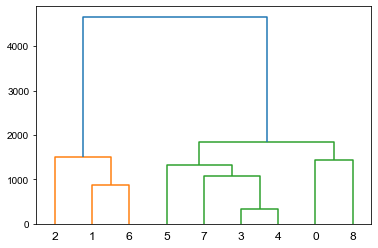

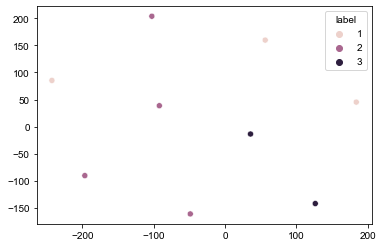

In [20]:
info = pyswcloader.cluster.cluster(n_cluster = 3,
                                   method = 'hierarchy',
                                   feature = 'precomputed',
                                  matrix = scores)

In [21]:
info

,file_path,neuron,label
0,/home/gao/Downloads/testdata/192710_009.swc,192710_009,3
1,/home/gao/Downloads/testdata/192710_010.swc,192710_010,1
2,/home/gao/Downloads/testdata/192710_012.swc,192710_012,1
3,/home/gao/Downloads/testdata/192710_013.swc,192710_013,2
4,/home/gao/Downloads/testdata/192710_014.swc,192710_014,2
5,/home/gao/Downloads/testdata/192710_016.swc,192710_016,2
6,/home/gao/Downloads/testdata/192710_017.swc,192710_017,1
7,/home/gao/Downloads/testdata/192710_018.swc,192710_018,2
8,/home/gao/Downloads/testdata/192710_019.swc,192710_019,3


In [22]:
# allen template brain whole-brain('root') mesh
urllib.request.urlretrieve('http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_meshes/997.obj',
                           '997.obj')

('997.obj', <http.client.HTTPMessage at 0x7f30d8daee80>)

RFBOutputContext()

100%|██████████| 3/3 [00:00<00:00, 29.18it/s]



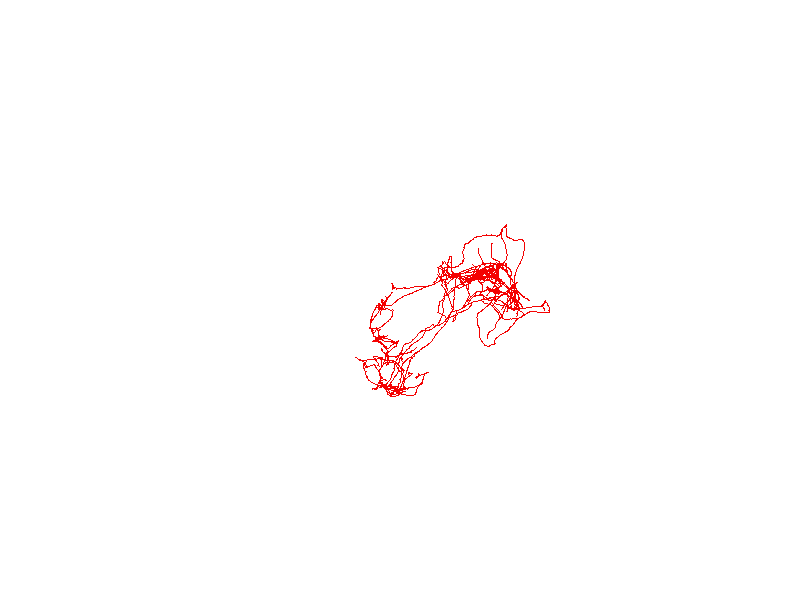

CanvasBackend(css_height='600px', css_width='800px')

In [23]:
# plot subtype 1

l = 1
canvas = pyswcloader.visualization.plot_neuron_3d(neuron_path = list(info[info.label==l]['file_path']), 
                                         region_path = '997.obj')
canvas